Intrinsic dimension = number of PCA features with significant
variance

In [1]:
%autosave 0

Autosave disabled


In [2]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [3]:
df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)
df.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14',
       'Perda30', 'PerdaAPI', 'PerdaPS', 'PERDA_MAX'],
      dtype='object')

In [4]:
df.head(5)

,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,...,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,PerdaAPI,PerdaPS,PERDA_MAX
1,C1,C1P1,A1,0.08,0.54,1000.0,0.61,1,1,1,...,1,1,0,0,0,0,1,1,0,100.0
2,C1,C1P1,A2,0.05,0.05,1000.0,0.54,1,1,1,...,1,1,0,0,0,0,0,0,0,12.0
3,C1,C1P1,A3,0.05,0.05,1000.0,0.61,1,1,1,...,1,1,0,0,0,0,0,0,0,10.0
4,C1,C1P1,B1,0.13,0.92,1000.0,0.63,1,1,1,...,1,1,0,0,0,0,0,0,0,0.0
5,C1,C1P2,A1,0.16,0.83,300.0,0.42,1,1,1,...,1,1,1,1,1,1,1,1,1,999.0


In [5]:
X=df[['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [6]:
#y = df['NOVO_MGPORO_QUARTILE']
#y = df['AREA_MGPORO_QUARTILE']
y=df['Perda30']

In [7]:
y=y.values

In [8]:
## Create scaler: scaler
#scaler = StandardScaler()

## Create a PCA instance: pca
#pca = PCA()

## Create pipeline: pipeline
#pipeline = make_pipeline(scaler, pca)

## Fit the pipeline to 'samples'
#X_trans=pipeline.fit(X)

## Plot the explained variances
#features = range(pca.n_components_)
#plt.bar(features, pca.explained_variance_)
#plt.xlabel('PCA feature')
#plt.ylabel('variance')
#plt.xticks(features)
#plt.show()

In [9]:
#pca.explained_variance_ratio_;

In [10]:
#eigenvalues = pca.explained_variance_;
#print(eigenvalues);
#print(eigenvalues.shape);

In [11]:
#eigenvectors = pca.components_;
#print(eigenvectors)
#print(eigenvectors.shape)

In [12]:
#np.dot(eigenvalues, eigenvectors);

In [13]:
#pca.singular_values_;

In [14]:
df.describe()

,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,...,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,PerdaAPI,PerdaPS,PERDA_MAX
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,...,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,0.155734,0.396109,514.812662,0.939148,0.194539,0.532423,0.170648,0.518771,0.638225,0.201365,...,0.696246,0.453925,0.477816,0.430034,0.290102,0.740614,0.225256,0.184300,0.088737,63.685392
std,0.163815,0.397911,390.707943,0.498942,0.396523,0.499801,0.376845,0.500502,0.481336,0.401706,...,0.460665,0.498724,0.500362,0.495928,0.454586,0.439047,0.418466,0.388392,0.284851,194.792139
min,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.050000,167.000000,0.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.050000,0.100000,405.000000,0.860000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.220000,0.920000,1000.000000,1.200000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000
max,0.940000,0.950000,1000.000000,2.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1100.000000


$$ Standardization_\!=\! \frac{x_i - \mu}{\sigma} $$

In [15]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X)

train_img = scaler.transform(X)
train_img

array([[-0.46310256,  0.36223386,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       [-0.64654878, -0.87130303,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       [-0.64654878, -0.87130303,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       ...,
       [-0.64654878, -0.61956081, -0.97634099, ..., -0.86861442,
         1.56430778,  0.59180268],
       [ 0.14838482,  1.21815741, -0.54048897, ..., -0.86861442,
         1.56430778,  0.59180268],
       [-0.64654878, -0.87130303, -1.0635114 , ..., -0.86861442,
         1.56430778,  0.59180268]])

In [16]:
dfp = pd.DataFrame(data = train_img, columns = ['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14'])
dfp.describe()

,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14
count,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02
mean,4.622772e-17,-4.293115e-16,2.220446e-16,-8.047222e-16,-6.252109e-17,-5.433651e-16,3.061639e-16,-4.721290e-16,-7.282760e-16,-5.471543e-16,7.718513e-16,7.472218e-16,-3.554229e-16,-3.228362e-16,-1.227687e-16,-1.757411e-15,1.197374e-16,-1.067027e-15
std,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00,1.001711e+00
min,-6.465488e-01,-8.713030e-01,-1.319895e+00,-1.885498e+00,-4.914524e-01,-1.067092e+00,-4.536092e-01,-1.038275e+00,-1.328213e+00,-5.021322e-01,-3.439776e-01,-6.392604e-01,-1.513980e+00,-9.117291e-01,-9.565734e-01,-8.686144e-01,-6.392604e-01,-1.689752e+00
25%,-6.465488e-01,-8.713030e-01,-8.917344e-01,-6.608202e-01,-4.914524e-01,-1.067092e+00,-4.536092e-01,-1.038275e+00,-1.328213e+00,-5.021322e-01,-3.439776e-01,-6.392604e-01,-1.513980e+00,-9.117291e-01,-9.565734e-01,-8.686144e-01,-6.392604e-01,-1.689752e+00
50%,-6.465488e-01,-7.454319e-01,-2.815416e-01,-1.589032e-01,-4.914524e-01,9.371260e-01,-4.536092e-01,9.631363e-01,7.528910e-01,-5.021322e-01,-3.439776e-01,-6.392604e-01,6.605108e-01,-9.117291e-01,-9.565734e-01,-8.686144e-01,-6.392604e-01,5.918027e-01
75%,3.929798e-01,1.318854e+00,1.243940e+00,5.237040e-01,-4.914524e-01,9.371260e-01,-4.536092e-01,9.631363e-01,7.528910e-01,-5.021322e-01,-3.439776e-01,1.564308e+00,6.605108e-01,1.096817e+00,1.045398e+00,1.151259e+00,1.564308e+00,5.918027e-01
max,4.795689e+00,1.394377e+00,1.243940e+00,3.274209e+00,2.034785e+00,9.371260e-01,2.204541e+00,9.631363e-01,7.528910e-01,1.991507e+00,2.907166e+00,1.564308e+00,6.605108e-01,1.096817e+00,1.045398e+00,1.151259e+00,1.564308e+00,5.918027e-01


In [17]:
dfp.columns

Index(['ATRIB_MED1', 'ATRIB_MAX1', 'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2',
       'MGP3', 'MGP4', 'MGP5', 'MGP6', 'MGP7', 'MGP8', 'MGP9', 'MGP10',
       'MGP11', 'MGP12', 'MGP13', 'MGP14'],
      dtype='object')

In [18]:
fontP = FontProperties()
fontP.set_size('small')

No handles with labels found to put in legend.


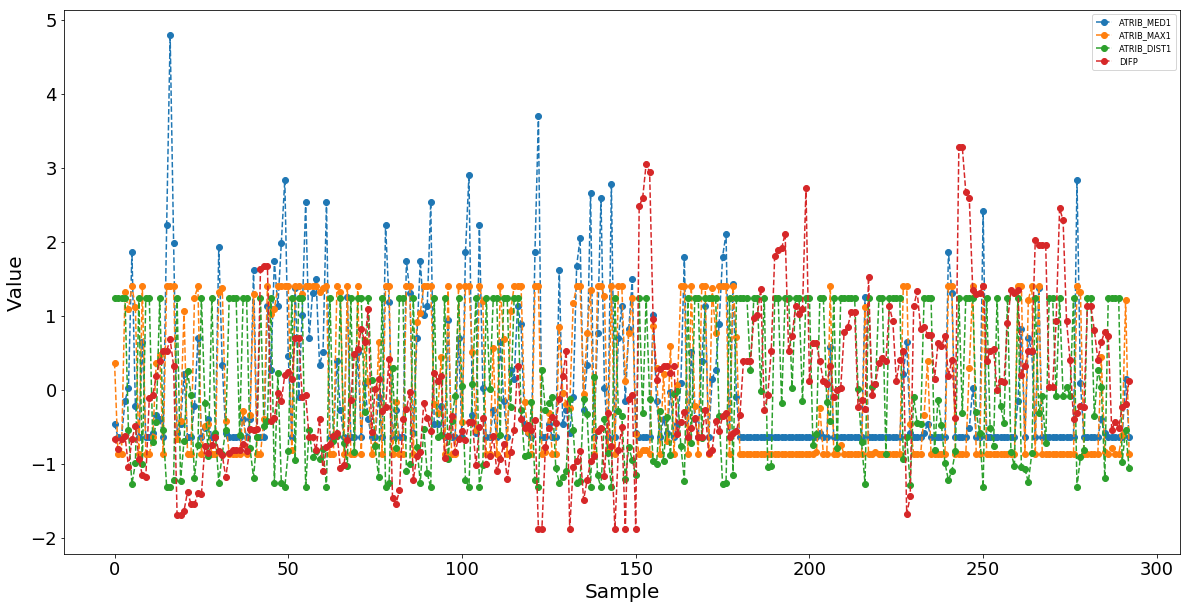

In [19]:
fig = plt.figure(figsize=(20, 10))
plt.plot(dfp.loc[:,:'DIFP'], '--o')
plt.legend(loc='lower right')
plt.ylabel('Value', fontsize=20);
plt.xlabel('Sample', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 18])
plt.legend(('ATRIB_MED1', 'ATRIB_MAX1', 'ATRIB_DIST1', 'DIFP'), loc='upper right', prop=fontP)
plt.show()

No handles with labels found to put in legend.


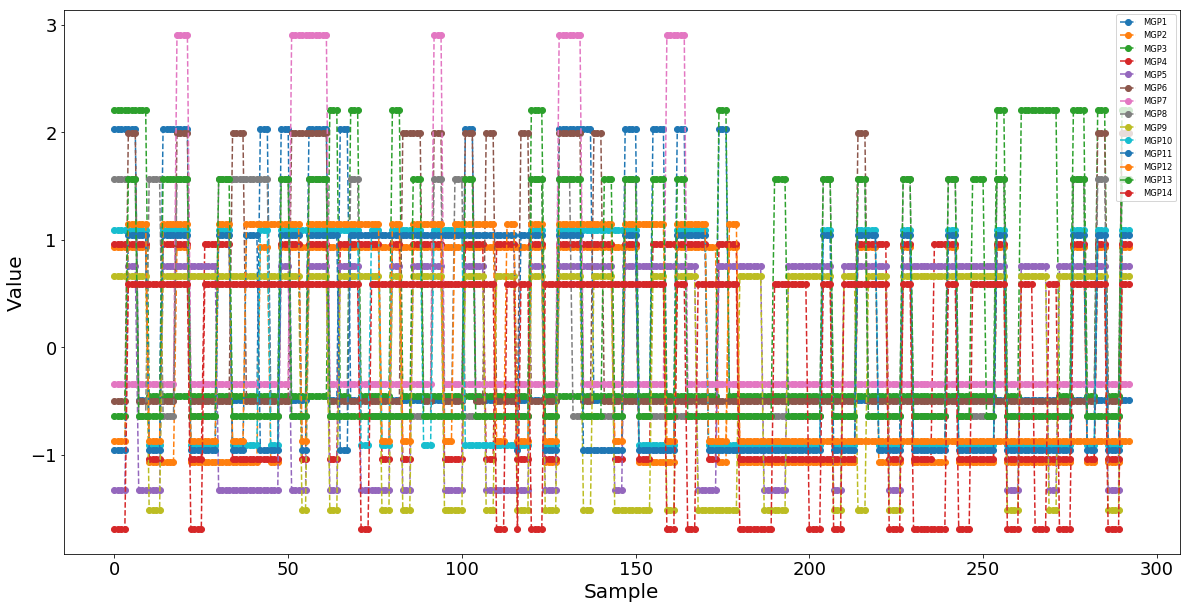

In [20]:
fig = plt.figure(figsize=(20, 10))
plt.plot(dfp.loc[:,'MGP1':], '--o')
plt.legend(loc='lower right')
plt.ylabel('Value', fontsize=20);
plt.xlabel('Sample', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 18])
plt.legend(('MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14'), loc='upper right', prop=fontP)
plt.show()

In [21]:
X=df[['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

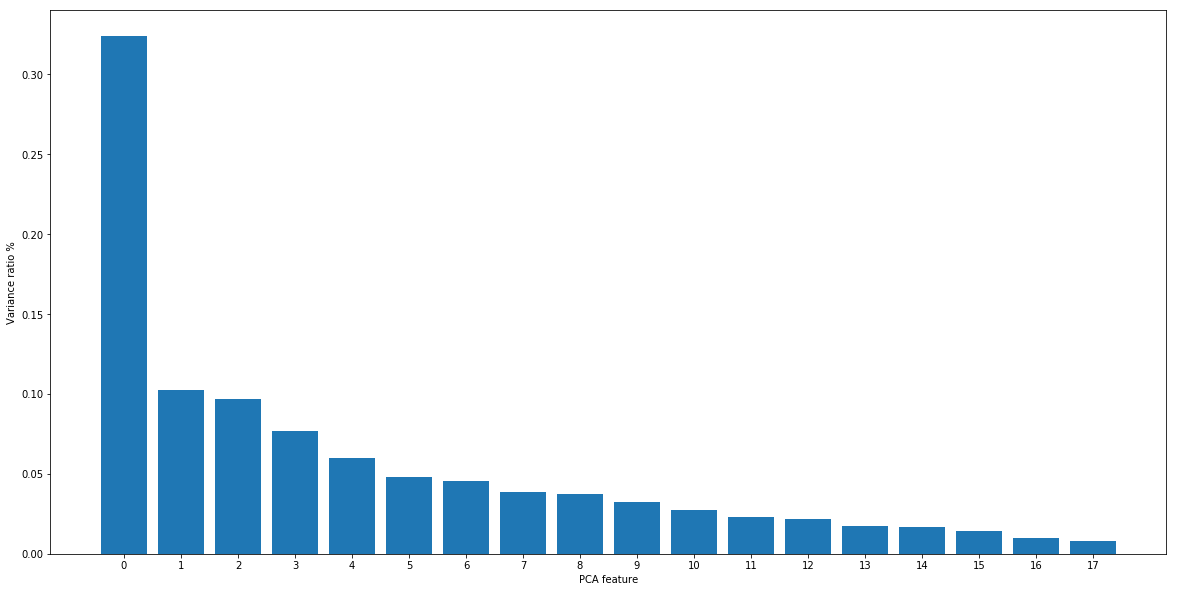

(293, 18)


In [22]:
n_comp=18

# Create a PCA instance: pca
pca = PCA(n_components=n_comp)

# Create pipeline: pipeline
#pipeline = make_pipeline(pca)

# Fit the pipeline to 'samples'
pca.fit(train_img)

# Plot the explained variances
fig = plt.figure(figsize=(20, 10))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance ratio %')
plt.xticks(features)
plt.show()

# Transform the scaled samples: pca_features
pca_features = pca.transform(train_img)

# Print the shape of pca_features
print(pca_features.shape)

(293, 18)


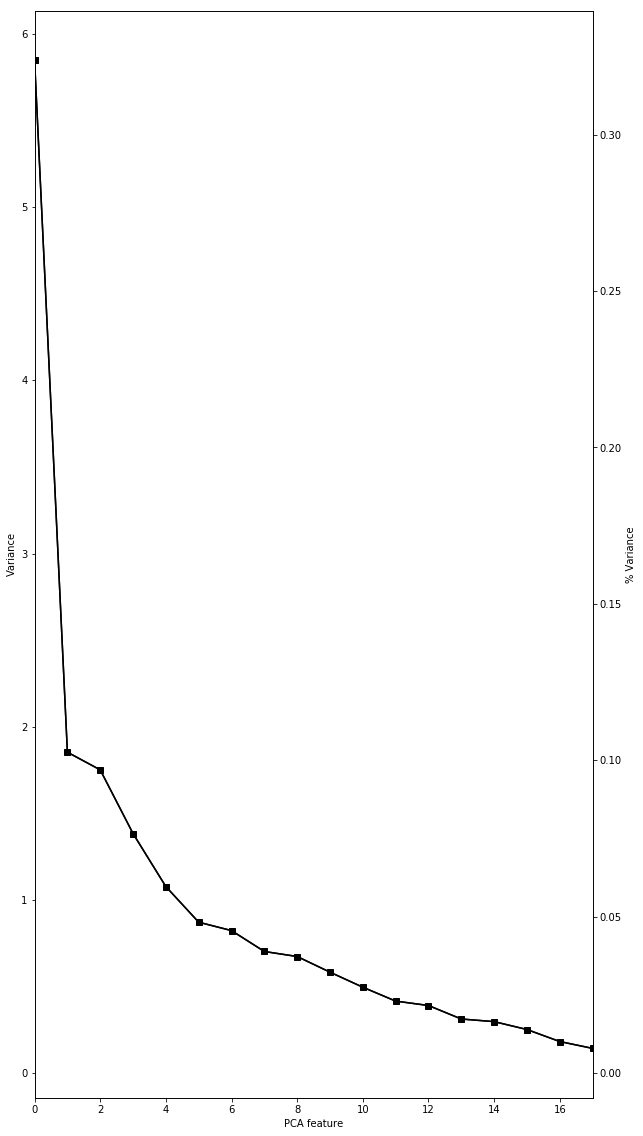

In [23]:
n_comp=18

# Create a PCA instance: pca
pca = PCA(n_components=n_comp)

# Create pipeline: pipeline
#pipeline = make_pipeline(pca)

# Fit the pipeline to 'samples'
pca.fit(train_img)

# Plot the explained variances
#fig = plt.figure(figsize=(20, 10))
#features = range(pca.n_components_)
#plt.plot(features, pca.explained_variance_, marker='s')
#plt.xlabel('PCA feature')
#plt.ylabel('Variance')
#plt.xticks(features)
#plt.show()

fig, ax1 = plt.subplots(figsize=(10, 20))

color = 'black'
ax1.set_xlabel('PCA feature')
ax1.set_ylabel('Variance', color=color)
ax1.set_xlim([0,17])
ax1.plot(features , pca.explained_variance_, marker='s', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('% Variance', color=color)  # we already handled the x-label with ax1
ax2.plot(features, pca.explained_variance_ratio_, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Transform the scaled samples: pca_features
pca_features = pca.transform(train_img)

# Print the shape of pca_features
print(pca_features.shape)

In [24]:
pca.mean_

array([-1.69754237e-16, -4.85012106e-17,  1.57628935e-16, -2.42506053e-16,
       -7.27518159e-17, -9.70024213e-17, -5.45638620e-17,  1.21253027e-16,
        9.70024213e-17, -4.85012106e-17, -2.42506053e-17,  4.85012106e-17,
       -1.09127724e-16, -4.85012106e-17,  2.42506053e-17,  0.00000000e+00,
        2.12192797e-17, -1.21253027e-16])

In [25]:
train_img

array([[-0.46310256,  0.36223386,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       [-0.64654878, -0.87130303,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       [-0.64654878, -0.87130303,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       ...,
       [-0.64654878, -0.61956081, -0.97634099, ..., -0.86861442,
         1.56430778,  0.59180268],
       [ 0.14838482,  1.21815741, -0.54048897, ..., -0.86861442,
         1.56430778,  0.59180268],
       [-0.64654878, -0.87130303, -1.0635114 , ..., -0.86861442,
         1.56430778,  0.59180268]])

In [26]:
print(pca_features,len(pca_features))

[[ 4.88593099e-01  4.89423474e-01 -1.73331079e+00 ...  2.32612357e-01
  -2.00057410e-01 -7.19028568e-04]
 [ 1.84391994e-01  5.87552224e-01 -2.44083784e+00 ...  2.67386292e-01
   2.22189391e-01  5.58317224e-01]
 [ 1.53774536e-01  5.44904920e-01 -2.43747158e+00 ...  2.77567420e-01
   2.19557058e-01  5.58133885e-01]
 ...
 [ 2.42812665e+00 -2.92824217e-01 -2.63648759e+00 ...  4.21411592e-01
  -2.64371717e-01  1.12626798e-02]
 [ 2.94041597e+00 -3.46110477e-01 -1.44776292e+00 ...  4.14169993e-01
  -5.56291997e-01 -5.74429196e-01]
 [ 2.30830634e+00 -4.13586443e-01 -2.72475351e+00 ...  4.59924158e-01
  -1.78411951e-01  1.43617451e-01]] 293


In [27]:
data_reduced = np.dot(train_img - pca.mean_, pca.components_.T)
print(data_reduced,len(data_reduced))

[[ 4.88593099e-01  4.89423474e-01 -1.73331079e+00 ...  2.32612357e-01
  -2.00057410e-01 -7.19028568e-04]
 [ 1.84391994e-01  5.87552224e-01 -2.44083784e+00 ...  2.67386292e-01
   2.22189391e-01  5.58317224e-01]
 [ 1.53774536e-01  5.44904920e-01 -2.43747158e+00 ...  2.77567420e-01
   2.19557058e-01  5.58133885e-01]
 ...
 [ 2.42812665e+00 -2.92824217e-01 -2.63648759e+00 ...  4.21411592e-01
  -2.64371717e-01  1.12626798e-02]
 [ 2.94041597e+00 -3.46110477e-01 -1.44776292e+00 ...  4.14169993e-01
  -5.56291997e-01 -5.74429196e-01]
 [ 2.30830634e+00 -4.13586443e-01 -2.72475351e+00 ...  4.59924158e-01
  -1.78411951e-01  1.43617451e-01]] 293


In [28]:
pca.explained_variance_ratio_

array([0.32384575, 0.10260315, 0.09695732, 0.07659206, 0.05964274,
       0.04826434, 0.04558442, 0.03890211, 0.03730101, 0.0322947 ,
       0.02748888, 0.02304908, 0.02163792, 0.0173224 , 0.0164869 ,
       0.01396766, 0.01012545, 0.0079341 ])

In [29]:
eigenvalues = pca.explained_variance_
print(eigenvalues)
print(eigenvalues.shape)

[5.84918668 1.85318161 1.7512086  1.38337852 1.0772459  0.87173332
 0.82332949 0.70263604 0.67371756 0.58329536 0.49649436 0.41630427
 0.39081649 0.31287096 0.2977806  0.2522789  0.18288228 0.14330289]
(18,)


In [30]:
eigenvectors = pca.components_
print(eigenvectors)
print(eigenvectors.shape)

[[ 2.23508792e-01  2.38190462e-01 -2.16505681e-01 -2.17860847e-01
   2.42472782e-01  3.06450262e-01  6.57824315e-02  3.10488119e-01
   1.06642309e-01  2.12299698e-01  1.93112224e-01  2.21778319e-01
   1.13859301e-01  3.23558818e-01  3.07909911e-01  2.71856882e-01
   2.69533201e-01  2.08799619e-01]
 [-9.95274237e-02 -3.01762491e-02  2.14457697e-01 -3.03460139e-01
  -1.86697981e-01  3.03471982e-01 -1.58713404e-02 -1.13103835e-01
  -5.85753076e-01  1.08883301e-01 -4.48262719e-02  1.72396670e-02
  -4.58962174e-01  1.27960366e-01  2.04069599e-01  7.65175052e-02
  -2.34119126e-01  1.56549359e-01]
 [ 5.25697825e-01  4.92667487e-01 -3.10922042e-01  2.39528543e-02
   9.72666342e-02 -8.32381838e-02 -2.85118446e-01 -1.45913207e-01
  -1.37079888e-01 -5.45877620e-02  2.71654823e-03 -3.13309219e-01
  -2.60826227e-01 -1.96295713e-01 -1.58309521e-01  5.59241921e-02
  -8.00395458e-02  6.00238441e-02]
 [ 1.99760276e-01  1.69511880e-01 -1.48061065e-01 -7.98387693e-02
  -2.16794748e-01  8.54283003e-02  5.

In [31]:
np.dot(eigenvalues, eigenvectors)

array([ 2.5946559 ,  2.49737315, -1.04000217, -1.85000904,  1.64522607,
        2.45002406,  1.23492066,  1.67842984, -0.83113698,  1.00431307,
        0.31881958,  0.70875048, -0.27890655,  1.79148375,  1.57691697,
        2.87232454, -0.06014839,  0.7311745 ])

In [32]:
pca.get_params();

In [33]:
(pca.inverse_transform(pca_features))

array([[-0.46310256,  0.36223386,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       [-0.64654878, -0.87130303,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       [-0.64654878, -0.87130303,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       ...,
       [-0.64654878, -0.61956081, -0.97634099, ..., -0.86861442,
         1.56430778,  0.59180268],
       [ 0.14838482,  1.21815741, -0.54048897, ..., -0.86861442,
         1.56430778,  0.59180268],
       [-0.64654878, -0.87130303, -1.0635114 , ..., -0.86861442,
         1.56430778,  0.59180268]])

In [34]:
data_original = np.dot(data_reduced, pca.components_) + pca.mean_
data_original

array([[-0.46310256,  0.36223386,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       [-0.64654878, -0.87130303,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       [-0.64654878, -0.87130303,  1.24394048, ..., -0.86861442,
        -0.63926039, -1.6897524 ],
       ...,
       [-0.64654878, -0.61956081, -0.97634099, ..., -0.86861442,
         1.56430778,  0.59180268],
       [ 0.14838482,  1.21815741, -0.54048897, ..., -0.86861442,
         1.56430778,  0.59180268],
       [-0.64654878, -0.87130303, -1.0635114 , ..., -0.86861442,
         1.56430778,  0.59180268]])

In [35]:
pca_features

array([[ 4.88593099e-01,  4.89423474e-01, -1.73331079e+00, ...,
         2.32612357e-01, -2.00057410e-01, -7.19028568e-04],
       [ 1.84391994e-01,  5.87552224e-01, -2.44083784e+00, ...,
         2.67386292e-01,  2.22189391e-01,  5.58317224e-01],
       [ 1.53774536e-01,  5.44904920e-01, -2.43747158e+00, ...,
         2.77567420e-01,  2.19557058e-01,  5.58133885e-01],
       ...,
       [ 2.42812665e+00, -2.92824217e-01, -2.63648759e+00, ...,
         4.21411592e-01, -2.64371717e-01,  1.12626798e-02],
       [ 2.94041597e+00, -3.46110477e-01, -1.44776292e+00, ...,
         4.14169993e-01, -5.56291997e-01, -5.74429196e-01],
       [ 2.30830634e+00, -4.13586443e-01, -2.72475351e+00, ...,
         4.59924158e-01, -1.78411951e-01,  1.43617451e-01]])

In [36]:
pca.explained_variance_ratio_

array([0.32384575, 0.10260315, 0.09695732, 0.07659206, 0.05964274,
       0.04826434, 0.04558442, 0.03890211, 0.03730101, 0.0322947 ,
       0.02748888, 0.02304908, 0.02163792, 0.0173224 , 0.0164869 ,
       0.01396766, 0.01012545, 0.0079341 ])

In [37]:
np.eye(n_comp);

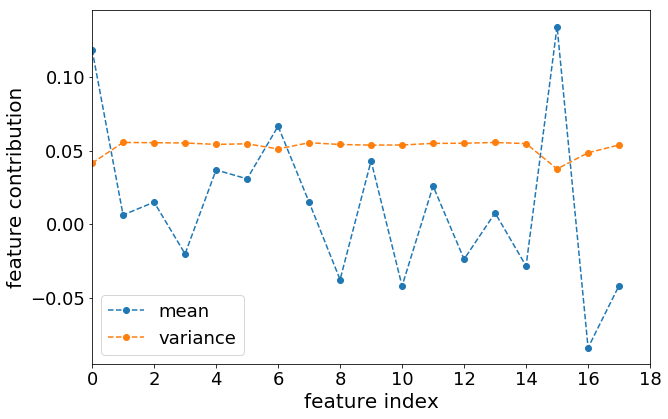

In [38]:
pca_inv_data = pca.inverse_transform(np.eye(n_comp))
fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
#plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 18])
plt.legend(loc='lower left', fontsize=18)
plt.show()

In [39]:
pca_inv_data

array([[ 2.23508792e-01,  2.38190462e-01, -2.16505681e-01,
        -2.17860847e-01,  2.42472782e-01,  3.06450262e-01,
         6.57824315e-02,  3.10488119e-01,  1.06642309e-01,
         2.12299698e-01,  1.93112224e-01,  2.21778319e-01,
         1.13859301e-01,  3.23558818e-01,  3.07909911e-01,
         2.71856882e-01,  2.69533201e-01,  2.08799619e-01],
       [-9.95274237e-02, -3.01762491e-02,  2.14457697e-01,
        -3.03460139e-01, -1.86697981e-01,  3.03471982e-01,
        -1.58713404e-02, -1.13103835e-01, -5.85753076e-01,
         1.08883301e-01, -4.48262719e-02,  1.72396670e-02,
        -4.58962174e-01,  1.27960366e-01,  2.04069599e-01,
         7.65175052e-02, -2.34119126e-01,  1.56549359e-01],
       [ 5.25697825e-01,  4.92667487e-01, -3.10922042e-01,
         2.39528543e-02,  9.72666342e-02, -8.32381838e-02,
        -2.85118446e-01, -1.45913207e-01, -1.37079888e-01,
        -5.45877620e-02,  2.71654823e-03, -3.13309219e-01,
        -2.60826227e-01, -1.96295713e-01, -1.58309521e

In [40]:
df_inv = pd.DataFrame(data = pca_inv_data, columns = ['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14'])

In [41]:
df_inv

,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14
0,0.223509,0.238190,-0.216506,-0.217861,0.242473,0.306450,0.065782,0.310488,0.106642,0.212300,0.193112,0.221778,0.113859,0.323559,0.307910,0.271857,0.269533,0.208800
1,-0.099527,-0.030176,0.214458,-0.303460,-0.186698,0.303472,-0.015871,-0.113104,-0.585753,0.108883,-0.044826,0.017240,-0.458962,0.127960,0.204070,0.076518,-0.234119,0.156549
2,0.525698,0.492667,-0.310922,0.023953,0.097267,-0.083238,-0.285118,-0.145913,-0.137080,-0.054588,0.002717,-0.313309,-0.260826,-0.196296,-0.158310,0.055924,-0.080040,0.060024
3,0.199760,0.169512,-0.148061,-0.079839,-0.216795,0.085428,0.533449,0.100110,0.001245,-0.430275,-0.582578,0.040460,0.058049,0.085058,0.088967,-0.073457,-0.058918,-0.024864
4,-0.067412,-0.019698,0.227647,-0.190826,0.018039,0.184359,-0.219813,0.342792,0.098940,-0.254413,-0.017160,-0.478295,0.260245,-0.042868,0.047709,0.444677,-0.311401,-0.191225
5,0.139552,0.209595,0.003706,-0.053452,-0.121853,0.158344,0.367726,0.029832,-0.003367,0.351295,0.356288,-0.068955,0.086969,0.004225,-0.025129,-0.266497,-0.311302,-0.571344
6,-0.048798,-0.022980,0.123890,-0.179846,0.644076,-0.084961,0.159494,0.067286,-0.159877,-0.327421,0.062900,0.171646,-0.303422,0.080363,-0.278706,0.064147,0.121677,-0.368883
7,-0.052793,-0.031355,0.117073,0.213866,0.262457,0.061105,0.517026,-0.008472,0.168930,0.167973,0.085620,-0.301638,-0.138223,-0.000390,-0.267550,0.132329,-0.263119,0.514082
8,0.162292,0.217539,0.383293,0.677629,0.026064,0.062005,0.017550,-0.182583,-0.237827,-0.128782,0.054499,0.188514,0.165731,0.150011,0.170754,0.283854,-0.009317,-0.103123
9,0.088454,0.195405,0.246184,-0.412888,0.111249,-0.258985,0.052936,-0.183133,-0.209393,0.150406,-0.087958,0.295949,0.522926,-0.250148,-0.182510,0.094533,-0.166694,0.198170


In [42]:
df_inv.describe()

,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.118472,0.006287,0.014995,-0.020130,0.036870,0.030792,0.066516,0.015028,-0.037598,0.042966,-0.041932,0.025951,-0.023752,0.007688,-0.028359,0.134213,-0.083833,-0.041624
std,0.209672,0.242449,0.242044,0.241649,0.239550,0.240457,0.232678,0.242042,0.239430,0.238472,0.238667,0.241061,0.241301,0.242407,0.240774,0.199376,0.226676,0.238724
min,-0.170145,-0.524553,-0.635359,-0.412888,-0.352278,-0.440532,-0.313872,-0.592152,-0.585753,-0.430275,-0.582578,-0.478295,-0.458962,-0.447634,-0.553970,-0.266497,-0.438442,-0.571344
25%,-0.050902,-0.057667,-0.113266,-0.188081,-0.170487,-0.091084,-0.022386,-0.107432,-0.197014,-0.104041,-0.077200,-0.055439,-0.152420,-0.183630,-0.230411,0.037778,-0.258205,-0.152128
50%,0.095448,-0.026578,0.087524,-0.010018,0.022051,0.042437,0.042201,-0.008738,-0.027886,0.052525,0.005960,0.028850,0.016912,0.042294,-0.009177,0.113431,-0.123367,-0.039767
75%,0.190393,0.188931,0.144956,0.069769,0.189918,0.177855,0.146922,0.140264,0.104717,0.201218,0.079940,0.184297,0.106935,0.201504,0.163992,0.259861,0.108620,0.051662
max,0.525698,0.492667,0.383293,0.677629,0.644076,0.494580,0.533449,0.406698,0.425572,0.509040,0.356288,0.489104,0.522926,0.336457,0.341518,0.444677,0.338349,0.514082


In [43]:
np.square(pca_inv_data.std(axis=0))

array([0.04151993, 0.05551602, 0.05533072, 0.05515034, 0.05419613,
       0.05460739, 0.05113116, 0.0553297 , 0.05414195, 0.05370946,
       0.05379726, 0.05488209, 0.05499139, 0.05549644, 0.05475133,
       0.03754251, 0.04852766, 0.05382298])

In [44]:
np.square(pca_inv_data.std(axis=0))

array([0.04151993, 0.05551602, 0.05533072, 0.05515034, 0.05419613,
       0.05460739, 0.05113116, 0.0553297 , 0.05414195, 0.05370946,
       0.05379726, 0.05488209, 0.05499139, 0.05549644, 0.05475133,
       0.03754251, 0.04852766, 0.05382298])

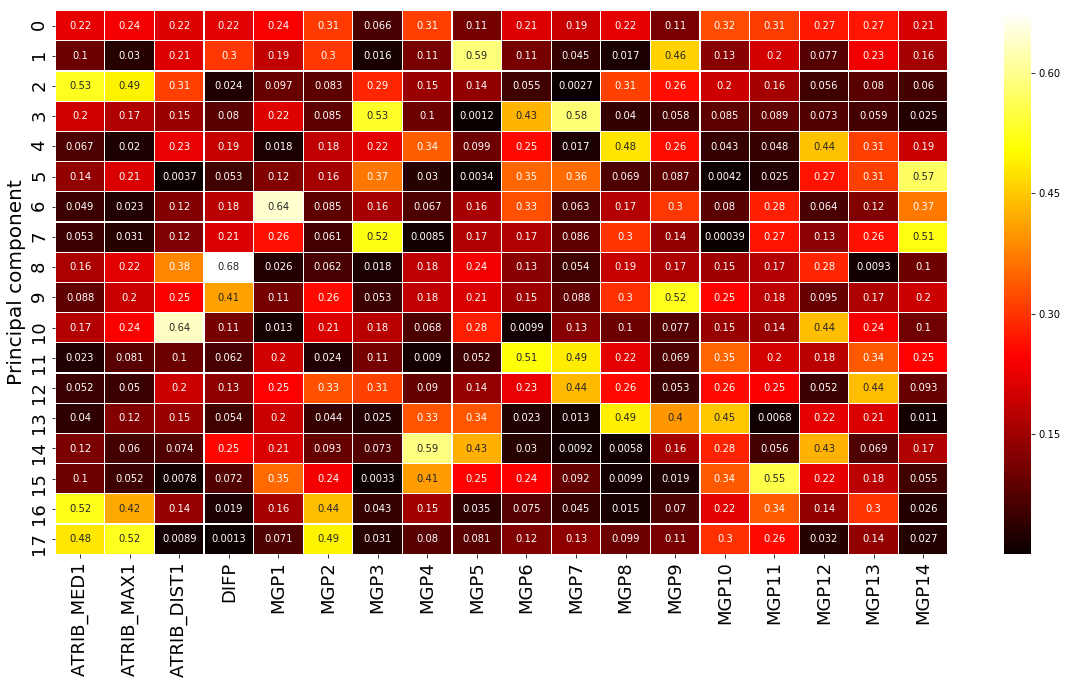

In [45]:
fig = plt.figure(figsize=(20, 10))                         
#sns.heatmap(pca.inverse_transform(np.eye(n_comp)), cbar=True, annot=True, cmap="hot")
sns.heatmap(np.absolute(pca.inverse_transform(np.eye(n_comp))), 
            cbar=True, annot=True, linewidths=.3, xticklabels=X.columns, cmap="hot")
plt.ylabel('Principal component', fontsize=20);
#plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.show()

In [46]:
np.absolute(pca.inverse_transform(np.eye(n_comp)))

array([[2.23508792e-01, 2.38190462e-01, 2.16505681e-01, 2.17860847e-01,
        2.42472782e-01, 3.06450262e-01, 6.57824315e-02, 3.10488119e-01,
        1.06642309e-01, 2.12299698e-01, 1.93112224e-01, 2.21778319e-01,
        1.13859301e-01, 3.23558818e-01, 3.07909911e-01, 2.71856882e-01,
        2.69533201e-01, 2.08799619e-01],
       [9.95274237e-02, 3.01762491e-02, 2.14457697e-01, 3.03460139e-01,
        1.86697981e-01, 3.03471982e-01, 1.58713404e-02, 1.13103835e-01,
        5.85753076e-01, 1.08883301e-01, 4.48262719e-02, 1.72396670e-02,
        4.58962174e-01, 1.27960366e-01, 2.04069599e-01, 7.65175052e-02,
        2.34119126e-01, 1.56549359e-01],
       [5.25697825e-01, 4.92667487e-01, 3.10922042e-01, 2.39528543e-02,
        9.72666342e-02, 8.32381838e-02, 2.85118446e-01, 1.45913207e-01,
        1.37079888e-01, 5.45877620e-02, 2.71654823e-03, 3.13309219e-01,
        2.60826227e-01, 1.96295713e-01, 1.58309521e-01, 5.59241921e-02,
        8.00395458e-02, 6.00238441e-02],
       [1.997

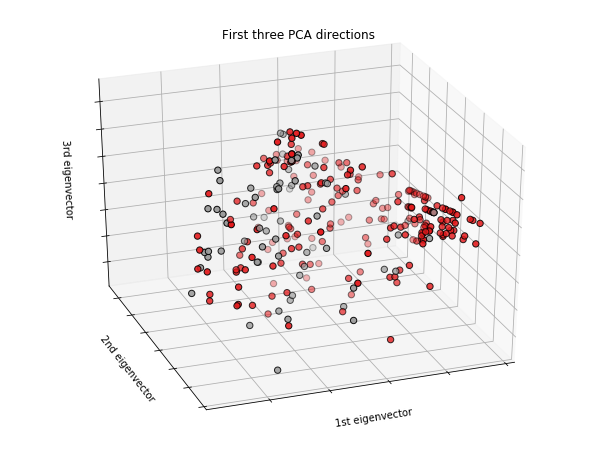

In [47]:
xs=pca_features[:,0]
ys=pca_features[:,1]
zs=pca_features[:,2]

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [48]:
df.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14',
       'Perda30', 'PerdaAPI', 'PerdaPS', 'PERDA_MAX'],
      dtype='object')

In [49]:
X=df[['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [50]:
y = df['Perda30']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)

<br>
## Neural Network

In [52]:
steps = [('scaler', StandardScaler()),('pca',PCA(n_components=18)) ,(('neural', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 32), random_state=1)))]
pipeline = Pipeline(steps)

hidden_layer_sizes=(n1, n2,..., nx) <br>
n1 = number of neurons in hidden layer_1 <br>
nx = number of neurons in hidden layer_x <br>

In [53]:
neural_scaled = pipeline.fit(X_train, y_train)

C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [54]:
y_pred = pipeline.predict(X_test) 

In [55]:
accuracy_score(y_test, y_pred)

0.7457627118644068

In [56]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

In [57]:
#for i in range(len(y_pred)):
#    print(y_pred_prob[i],y_pred[i])

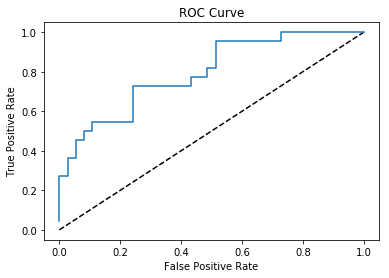

In [58]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [59]:
roc_auc_score(y_test, y_pred_prob)

0.7948402948402948

In [60]:
confusion_matrix(y_test,y_pred)

array([[32,  5],
       [10, 12]], dtype=int64)

In [61]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.86      0.81        37
          1       0.71      0.55      0.62        22

avg / total       0.74      0.75      0.74        59



In [62]:
cv_scores = cross_val_score(pipeline, X, y, cv=10)

C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum

In [63]:
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.7        0.56666667 0.63333333 0.66666667 0.7        0.63333333
 0.79310345 0.82142857 0.67857143 0.75      ]
Average 5-Fold CV Score: 0.6943103448275861
